In [1]:
#We now want to add acceptance rate and entrance rate to our data file

import pandas as pd

#Read the CSV file into a Pandas DataFrame
df = pd.read_csv("Data/Florian_Wirtz_eigentlich_noch_was_mit_der.csv")

years = ['2019', '2020', '2021', '2022', '2023']

# Calculate acceptance rate and entrance rate for each year
for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    entrants_col = f'Entrances {year}'
    accept_rate_col = f'Acceptance Rate {year}'
    entrance_rate_col = f'Entrance Rate {year}'
    
    # Calculate acceptance rate: offers / applications
    df[accept_rate_col] = df[offers_col] / df[apps_col]
    
    # Calculate entrance rate: entrants / offers
    df[entrance_rate_col] = df[entrants_col] / df[offers_col]

df.to_csv("Data/MAXI.csv", index=False)

In [2]:
# Now we want to filter out the european students, in our data they are characterized by nationality
import csv

# Define the file paths, downloaded these csv files from GITHUB
eu_countries_file = "Data/EU-countries.csv"
nationalities_file = "Data/countries.csv"

# Initialize a set to store European nationalities
EU_nationalities = set()

# get EU countries from the CSV file
eu_countries = set()
with open(eu_countries_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        country_name = row[2].strip()  # country name is in first column
        eu_countries.add(country_name)

# Read the nationalities from the CSV file and filter European nationalities
with open(nationalities_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) 
    for row in reader:
        country_name = row[3].strip()  # country name is in fourth column
        if country_name in eu_countries: 
            EU_nationalities.add(row[4])  # nationality is in fifth column
# check if all countries are there(should be 27)            
print(len(EU_nationalities))

27


In [3]:
#Now we change the CSV file with the acceptance rates so it oonly includes EU students

# Define the file paths
input_csv_file = "Data/MAXI.csv" 
output_csv_file = "Data/EU_students_acceptance_by_department.csv"  

# Open the input CSV file for reading and the output CSV file for writing
with open(input_csv_file, newline='', encoding='utf-8') as input_file, \
     open(output_csv_file, 'w', newline='', encoding='utf-8') as output_file:
    # Create CSV reader and writer objects
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)

    # Read and write the first header row to the output file
    first_header = next(reader)
    writer.writerow(first_header)

    # Iterate over each row in the input CSV file
    for row in reader:
        # Check if the nationality in the first column is in the list of European nationalities
        if row[0].strip() in EU_nationalities:
            # Write the row to the output CSV file
            writer.writerow(row)


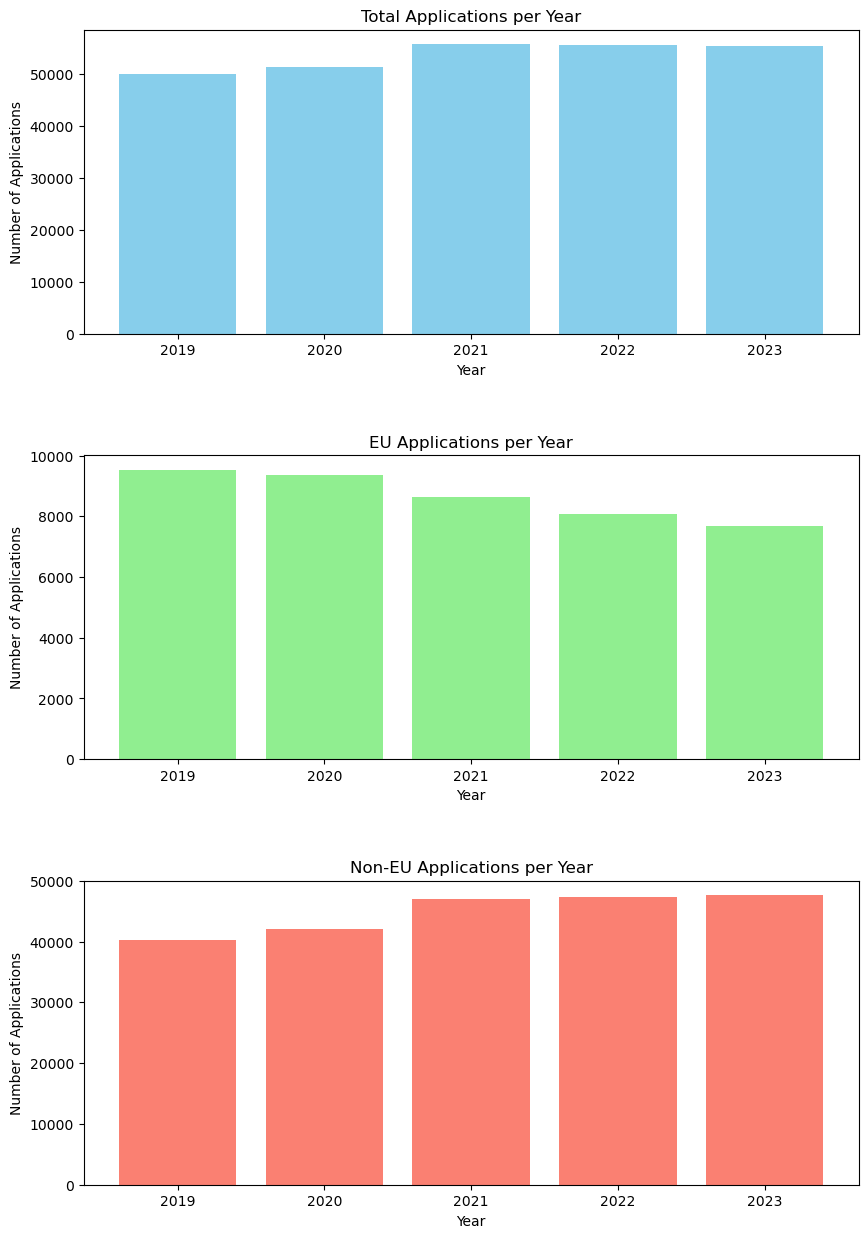

In [6]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the summary data
# We first need to calculate the summary data based on your df after filtering
years = ['2019', '2020', '2021', '2022', '2023']
summary_data = {
    "Year": [],
    "Total Applications": [],
    "EU Applications": [],
    "Non-EU Applications": []
}

# Sum applications per year for EU and Total applications
for year in years:
    apps_col = f'Applications {year}'
    summary_data["Year"].append(int(year))
    summary_data["EU Applications"].append(df[df['Nationality'].isin(EU_nationalities)][apps_col].sum())
    summary_data["Total Applications"].append(df[apps_col].sum())
    summary_data["Non-EU Applications"].append(df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum())

# Convert summary_data to DataFrame
summary_df = pd.DataFrame(summary_data)

# Set up the plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.subplots_adjust(hspace=0.4)

# Plot total applications per year
axes[0].bar(summary_df['Year'], summary_df['Total Applications'], color='skyblue')
axes[0].set_title('Total Applications per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Applications')

# Plot EU applications per year
axes[1].bar(summary_df['Year'], summary_df['EU Applications'], color='lightgreen')
axes[1].set_title('EU Applications per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Applications')

# Plot Non-EU applications per year
axes[2].bar(summary_df['Year'], summary_df['Non-EU Applications'], color='salmon')
axes[2].set_title('Non-EU Applications per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Applications')

plt.show()


In [10]:
import pandas as pd

# Assuming 'df' is your main DataFrame with the applications, offers, and entrances data.
years = [2019, 2020, 2021, 2022, 2023]
summary_data = {'Year': [], 'Total Applications': [], 'EU Applications': [], 'Non-EU Applications': [], 'Total Acceptance Rate': [], 'EU Acceptance Rate': [], 'Non-EU Acceptance Rate': []}

for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    
    # Total calculations
    total_apps = df[apps_col].sum()
    total_offers = df[offers_col].sum()
    total_acceptance_rate = total_offers / total_apps
    
    # EU calculations
    eu_apps = df[df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    eu_offers = df[df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    eu_acceptance_rate = eu_offers / eu_apps
    
    # Non-EU calculations
    non_eu_apps = df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    non_eu_offers = df[~df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    non_eu_acceptance_rate = non_eu_offers / non_eu_apps
    
    summary_data['Year'].append(year)
    summary_data['Total Applications'].append(total_apps)
    summary_data['EU Applications'].append(eu_apps)
    summary_data['Non-EU Applications'].append(non_eu_apps)
    summary_data['Total Acceptance Rate'].append(total_acceptance_rate)
    summary_data['EU Acceptance Rate'].append(eu_acceptance_rate)
    summary_data['Non-EU Acceptance Rate'].append(non_eu_acceptance_rate)

summary_df = pd.DataFrame(summary_data)
summary_df


,Year,Total Applications,EU Applications,Non-EU Applications,Total Acceptance Rate,EU Acceptance Rate,Non-EU Acceptance Rate
0,2019,49864.0,9536.0,40328.0,0.277274,0.288853,0.274536
1,2020,51341.5,9347.5,41994.0,0.304023,0.316448,0.301257
2,2021,55669.0,8628.5,47040.5,0.247903,0.269688,0.243907
3,2022,55427.5,8070.0,47357.5,0.268414,0.309727,0.261374
4,2023,55299.0,7679.0,47620.0,0.267455,0.317359,0.259408


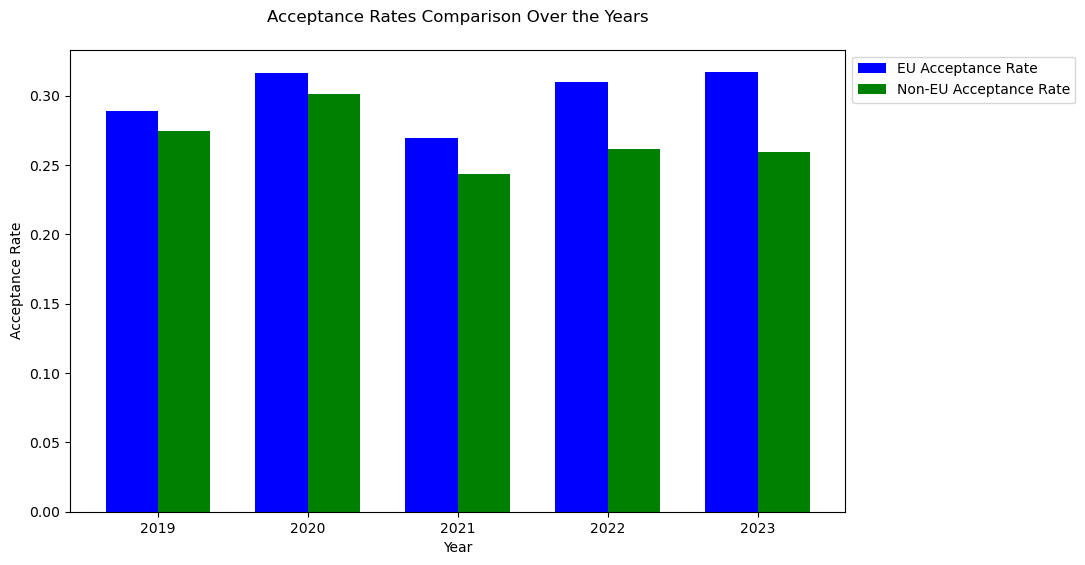

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'summary_df' is available and contains the necessary columns
years = summary_df['Year']
eu_rates = summary_df['EU Acceptance Rate']
non_eu_rates = summary_df['Non-EU Acceptance Rate']

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # bar width
x = np.arange(len(years))  # the label locations

# Plotting the bars for EU and Non-EU acceptance rates
ax.bar(x - width/2, eu_rates, width, label='EU Acceptance Rate', color='blue')
ax.bar(x + width/2, non_eu_rates, width, label='Non-EU Acceptance Rate', color='green')

ax.set_xlabel('Year')
ax.set_ylabel('Acceptance Rate')
ax.set_title('Acceptance Rates Comparison Over the Years', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [14]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming your DataFrame 'summary_df' is already loaded with EU application data
# Calculating RDD using 'summary_df' with total EU applications
summary_df['Time'] = summary_df['Year'] - 2020.5
summary_df['Post_Brexit'] = (summary_df['Year'] > 2020).astype(int)

# Define the regression formula for RDD
formula = 'EU_Applications ~ Time + Post_Brexit'

# Fit the regression discontinuity model
rdd_model = smf.ols(formula, data=summary_df).fit()

# Creating a scatter plot with a fitted line to show the discontinuity
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['Year'], summary_df['EU_Applications'], color='blue', label='EU Applications')
# Adding a line plot for fitted values
plt.plot(summary_df['Year'], rdd_model.fittedvalues, color='red', label='Fitted line')
plt.axvline(x=2020.5, color='green', linestyle='--', label='Brexit Cutoff')
plt.title('Regression Discontinuity: Impact of Brexit on EU Applications')
plt.xlabel('Year')
plt.ylabel('Total EU Applications')
plt.legend()
plt.grid(True)
plt.show()


PatsyError: Error evaluating factor: NameError: name 'EU_Applications' is not defined
    EU_Applications ~ Time + Post_Brexit
    ^^^^^^^^^^^^^^^